# Use-Cases of TDA Usage on 3D Shapes


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings

warnings.simplefilter('ignore')

### Load the 3D cloud point


In [2]:
import numpy as np


def load_shape_file(filepath: str) -> np.ndarray:
    cloud = []
    with open(filepath, 'r') as stream:
        while len(coordinates := stream.readline().split(' ')) == 3:
            cloud.append(np.asarray(coordinates).astype('float'))

    return np.vstack(cloud)


cloud = load_shape_file('./samples/hand.off')

### Build the persistence, and extract the components of dimension 0


In [3]:
from topologyx.filtrations import Filtration, FiltrationType

In [4]:
filtration = Filtration(cloud, use_alpha=False)

filtration.build_persistence_diagram(filtration_type=FiltrationType.SIMPLE, dimension=0)

### Compute the relative betti curve, based on dimension 0 components


In [5]:
betti_curves = filtration.betti_curve()

### Compute the relative landscapes, based on dimension 0 components


In [6]:
persistence_landscapes = filtration.persistence_landscapes()

### General visualization


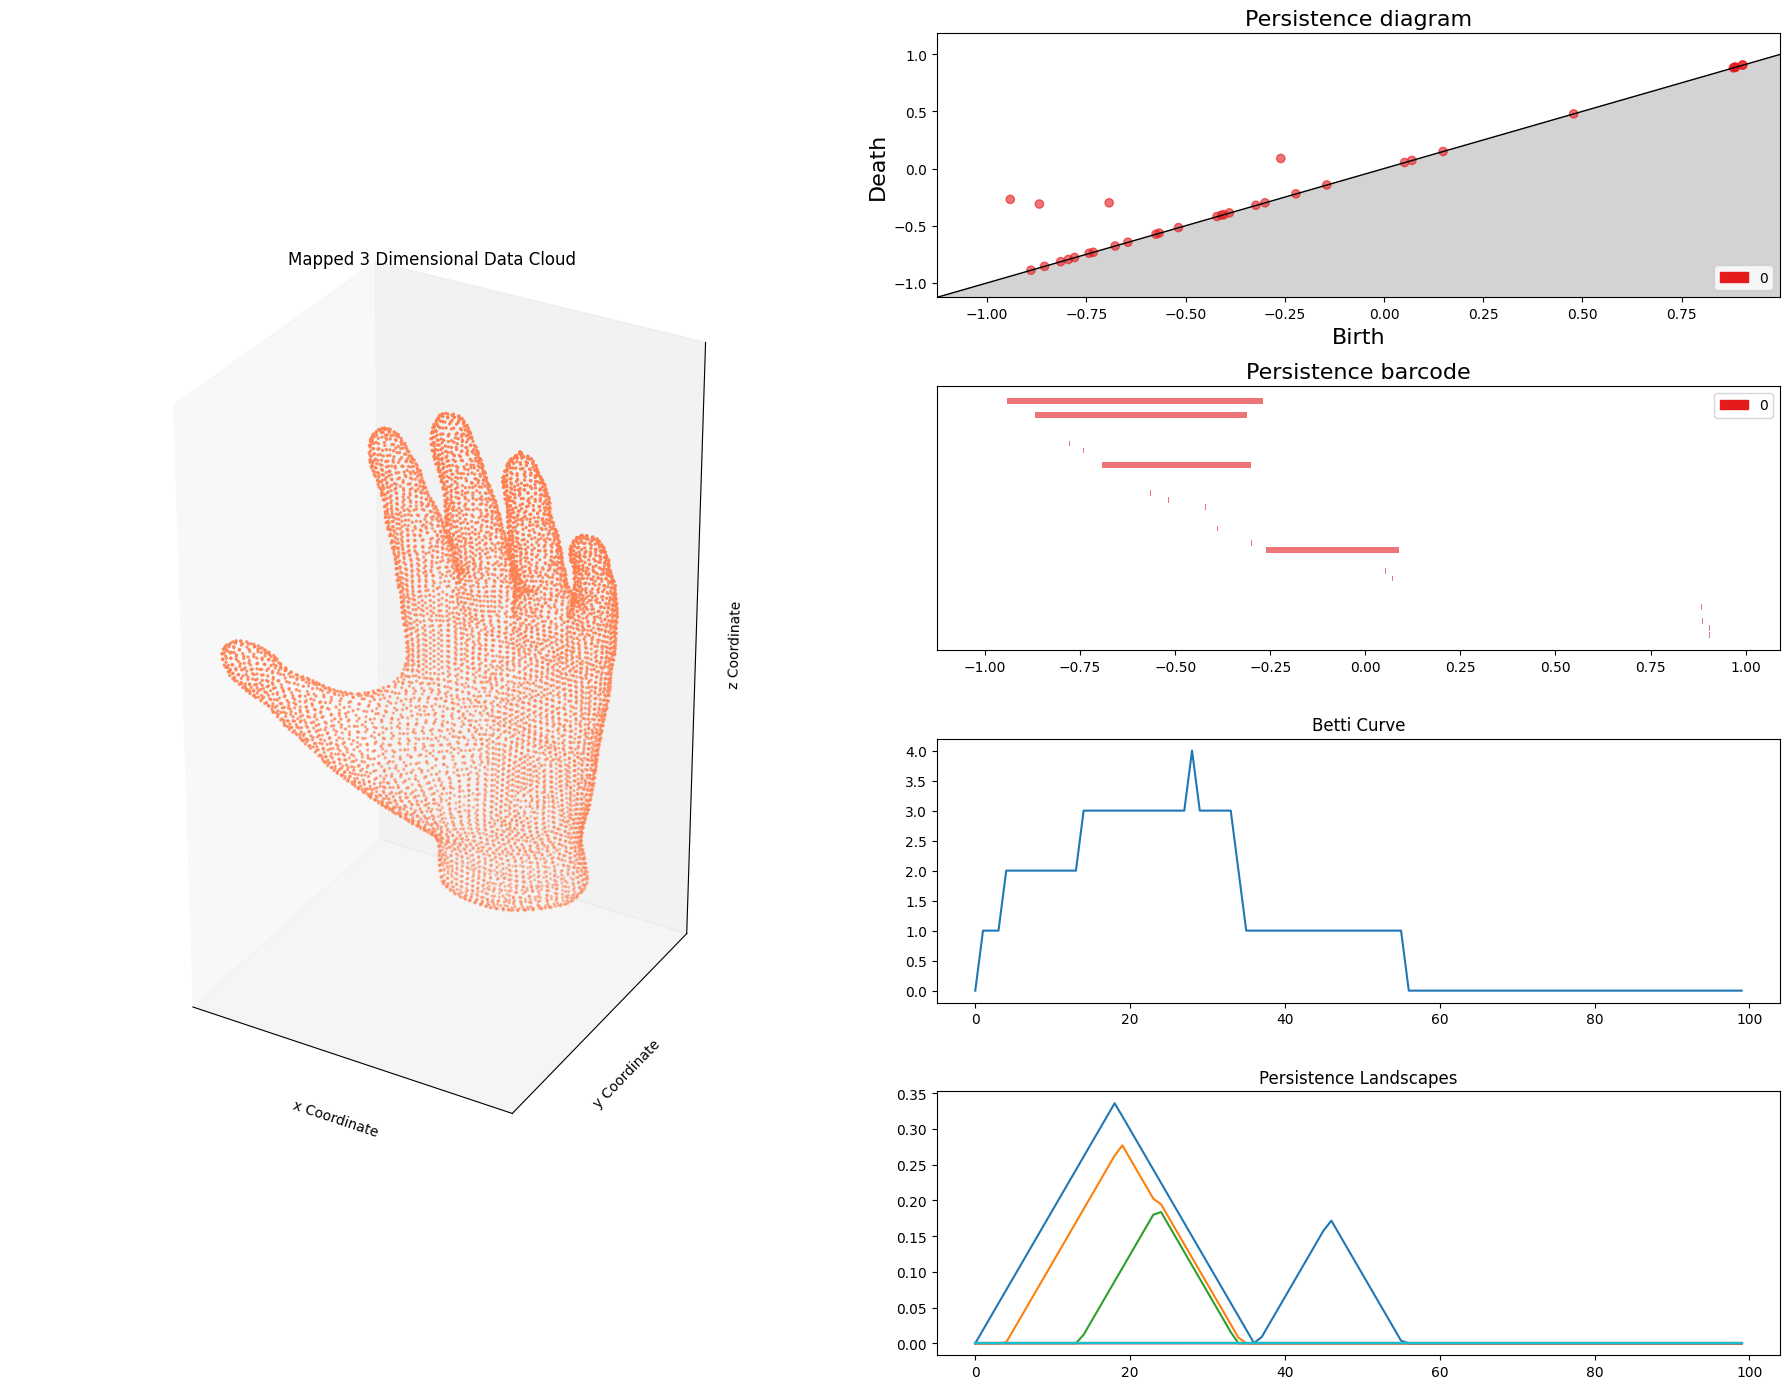

In [7]:
import gudhi
import matplotlib.pyplot as plt

diagram = [(0, tuple(e)) for e in filtration.simplex]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 14))
grid = axes[0, 0].get_gridspec()

for axe in axes[0:, 0]:
    axe.remove()

axe_0 = fig.add_subplot(grid[0:, 0], projection='3d')
axe_0.set_box_aspect(aspect=(1.5, 1.5, 2.75))  # type: ignore
axe_0.set_title('Mapped 3 Dimensional Data Cloud')
axe_0.set_xticks([])
axe_0.set_yticks([])
axe_0.set_zticks([])  # type: ignore
axe_0.scatter(cloud[:, 0], cloud[:, 1], cloud[:, 2], s=2, c='coral')  # type: ignore
axe_0.set_xlabel('x Coordinate')
axe_0.set_ylabel('y Coordinate')
axe_0.set_zlabel('z Coordinate')  # type: ignore

gudhi.plot_persistence_diagram(diagram, axes=axes[0, 1])  # type: ignore

gudhi.plot_persistence_barcode(diagram, axes=axes[1, 1])  # type: ignore

axes[2, 1].set_title('Betti Curve')
axes[2, 1].plot(betti_curves)

axes[3, 1].set_title('Persistence Landscapes')
for landscape in persistence_landscapes:
    axes[3, 1].plot(landscape)

fig.tight_layout()
plt.show()